In [49]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
from matplotlib.colors import Normalize
import math

%matplotlib inline

In [57]:
with open('data.json', 'r') as f:
    data = json.load(f)
kobe=json.loads(data)

for i in range(len(kobe['season_list'])):
    kobe['shot'][kobe['season_list'][i]]=pd.read_json(kobe['shot'][kobe['season_list'][i]])
all_shot=kobe['shot']['1999-00'].copy()
for i in range(1,len(kobe['season_list'])):
    all_shot=all_shot.append(kobe['shot'][kobe['season_list'][i]],ignore_index=True)
#kobe['shot']['all']=all_shot
#kobe['season_list']=['all']+kobe['season_list']

In [3]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

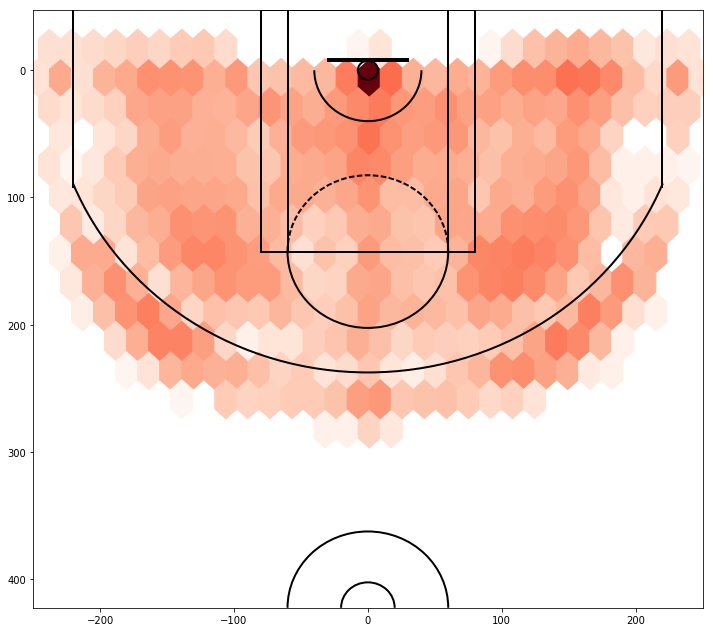

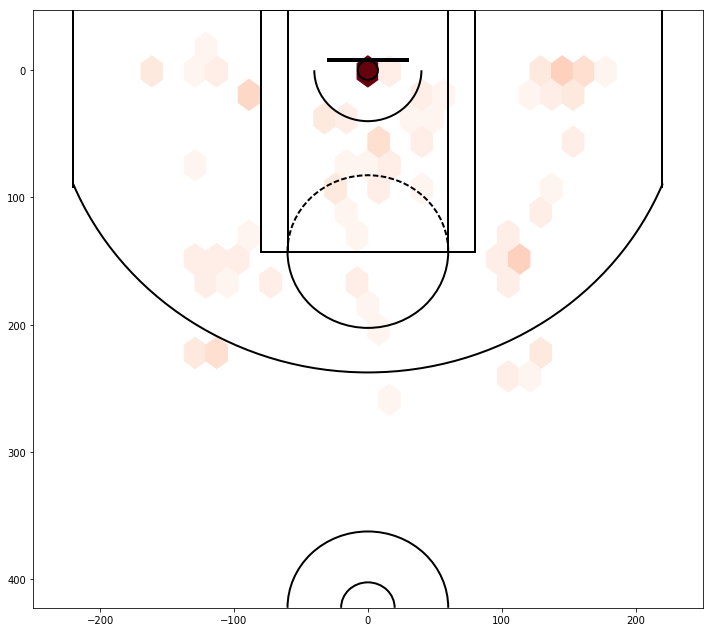

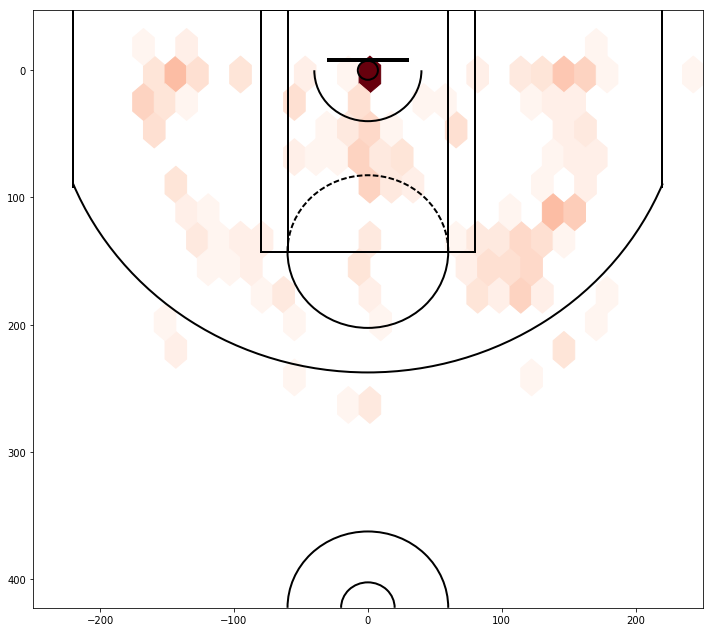

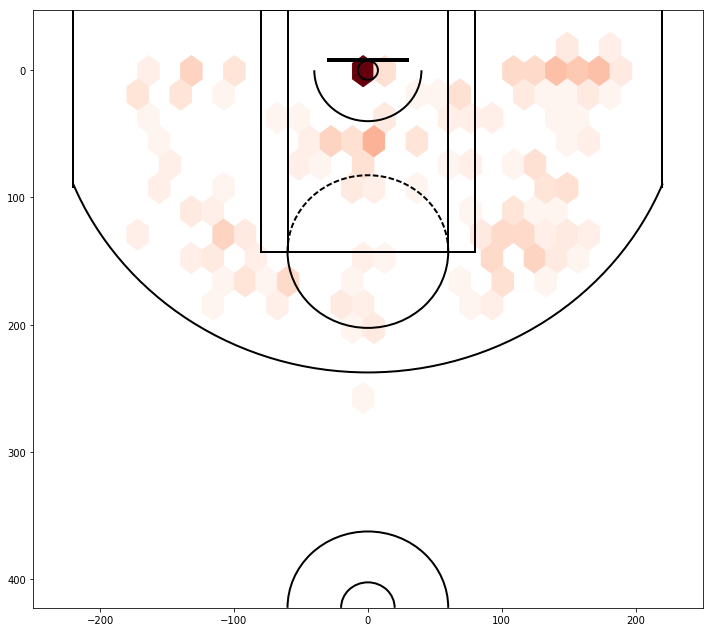

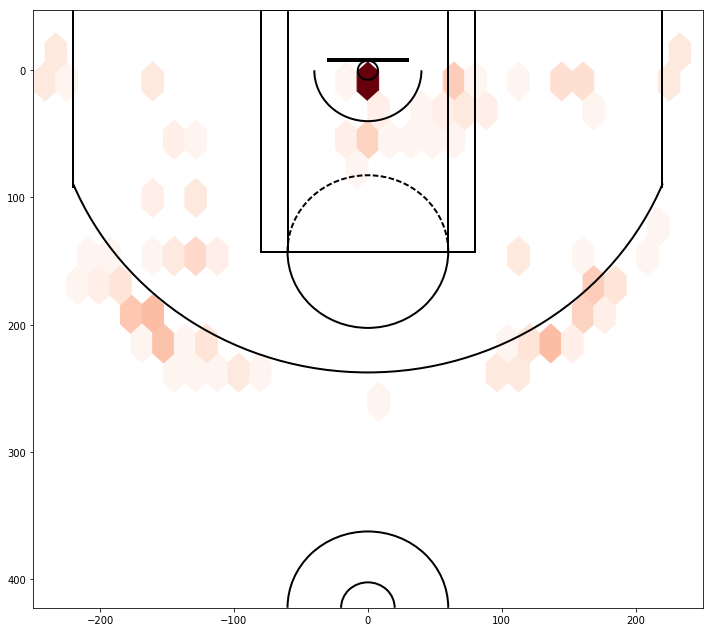

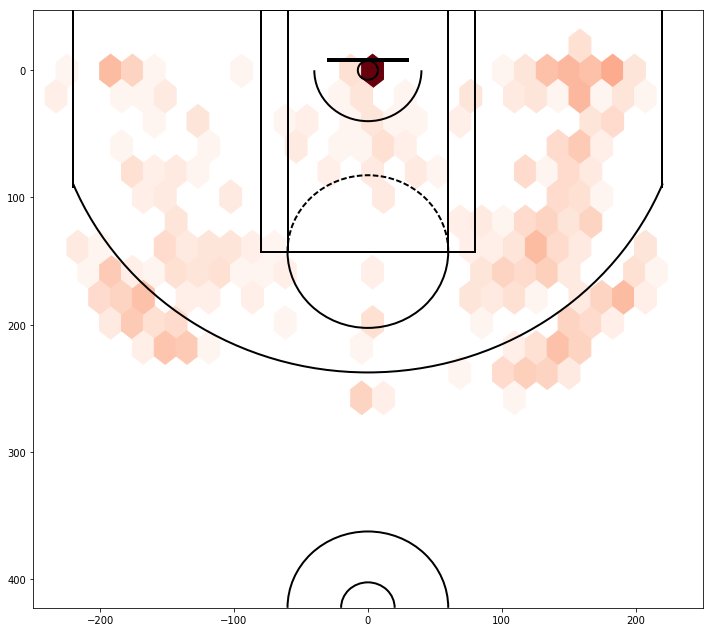

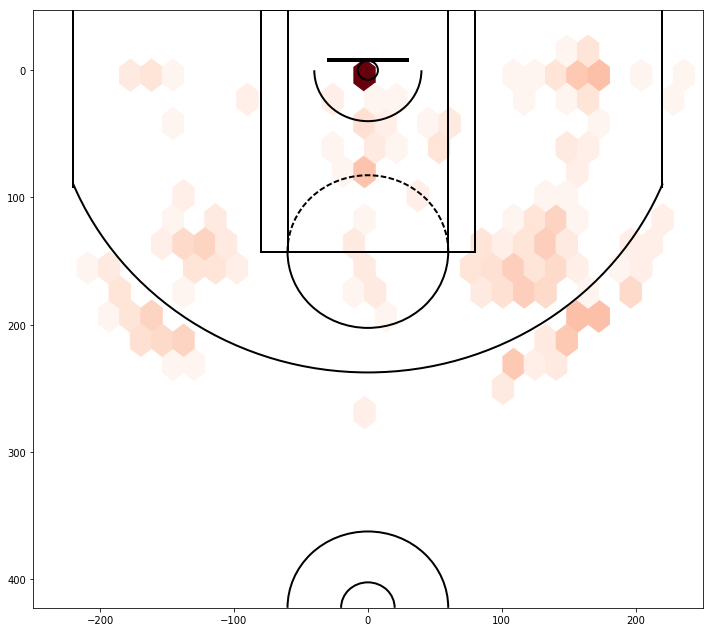

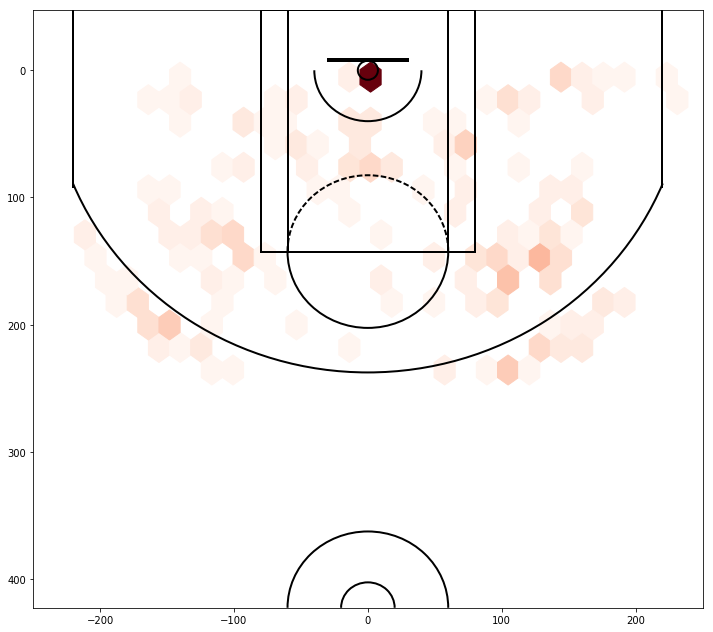

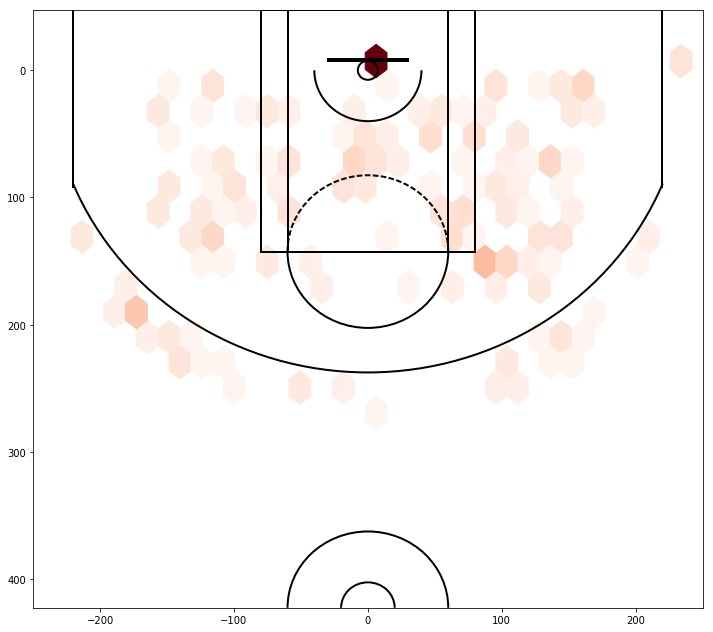

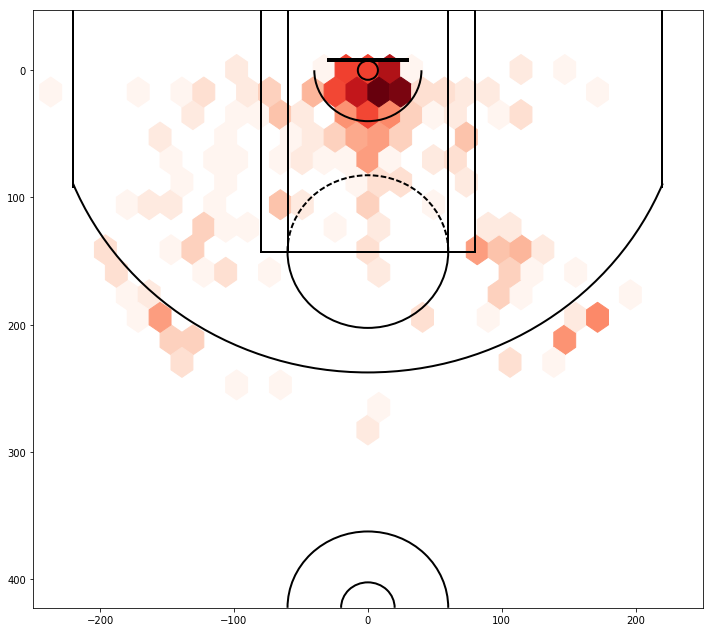

In [4]:
for i in range(len(kobe['season_list'])):
    shot_df=kobe['shot'][kobe['season_list'][i]].copy()
    plt.figure(figsize=(12,11))
    hb=plt.hexbin(shot_df.LOC_X, shot_df.LOC_Y,bins='log',gridsize=30,cmap='Reds',mincnt=5)
    ax=draw_court()

# Adjust plot limits to just fit in half court
    plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
    plt.ylim(422.5, -47.5)

In [65]:
def hex_item_cal(x, y, gridsize=20, bins="log", cmap=plt.cm.Reds):
    hex_item={}
    
    new_x=[]
    new_y=[]
    
    for i in range(len(x)):
        if y[i]>-27.5 and y[i]<422.5:
            new_x.append(x[i])
            new_y.append(y[i])
    x=new_x
    y=new_y

    plt.xlim(-250,250)
    plt.ylim(422.5, -47.5)
    collection = plt.hexbin(x, y, bins=bins,cmap='Reds', gridsize=gridsize,mincnt=1)

    nums=collection.get_array().copy().tolist()
    max_num=max(nums)
    max_index=nums.index(max_num)
    nums.remove(max_num)
    sec_max=max(nums)
    nums=collection.get_array()
    nums[max_index]=min(sec_max+math.log10(2),max_num)
    colors = ["#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*cmap(Normalize()(nums))]
    
    hex_item["colors"]=colors
    
    nx = gridsize
    ny = int(nx / math.sqrt(3))
    
    x = np.array(x, float)
    y = np.array(y, float)
    
    xmin, xmax = (np.min(x), np.max(x)) if len(x) else (0, 1)
    ymin, ymax = (np.min(y), np.max(y)) if len(y) else (0, 1)
    xmin, xmax = mtrans.nonsingular(xmin, xmax, expander=0.1)
    ymin, ymax = mtrans.nonsingular(ymin, ymax, expander=0.1)
    
    padding = 1.e-9 * (xmax - xmin)
    xmin -= padding
    xmax += padding
    sx = (xmax - xmin) / nx
    sy = (ymax - ymin) / ny
    
    polygon = np.zeros((6, 2), float)
    polygon[:, 0] = sx * np.array([0.5, 0.5, 0.0, -0.5, -0.5, 0.0])
    polygon[:, 1] = sy * np.array([-0.5, 0.5, 1.0, 0.5, -0.5, -1.0]) / 3.0
    
    offsets=np.array(collection.get_offsets())   
    polygons = np.expand_dims(polygon, 0) + np.expand_dims(offsets, 1)
    
    hex_item['x_loc']=polygons[:, :, 0].tolist()
    hex_item['y_loc']=polygons[:, :, 1].tolist()
    
    hit=collection.get_array().tolist()
    for i in range(len(hit)):
        hit[i]=int(pow(10,hit[i]))
    
    hex_item['made']=hit
    return hex_item

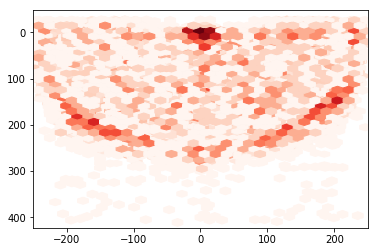

In [66]:
kobe['hex_item']={}

for i in range(len(kobe['season_list'])):
    shot_df=kobe['shot'][kobe['season_list'][i]].copy()
    hex_item=hex_item_cal(shot_df['LOC_X'], shot_df['LOC_Y'], gridsize=30, bins="log", cmap=plt.cm.Reds)
    kobe['hex_item'][kobe['season_list'][i]]=hex_item

In [67]:
for i in range(len(kobe['season_list'])):
    shot_df=kobe['shot'][kobe['season_list'][i]].copy()
    shot_item={}
    shot_item['x_loc']=list(shot_df['LOC_X'])
    shot_item['y_loc']=list(shot_df['LOC_Y'])
    shot_item['shot_type']=list(shot_df['ACTION_TYPE'])
    
    kobe['shot'][kobe['season_list'][i]]=shot_item

In [68]:
json_str=json.dumps(kobe)
with open('kobe.json', 'w') as f:
    json.dump(json_str, f)